In [1]:
import aiohttp
import pandas as pd
import datetime
from IPython.display import Image, display

In [2]:
df = pd.read_csv("./data/weather_dataset_demo.csv")

In [3]:
subscription_key = "Your primary subscription key here"
coords = pd.unique(df[['latitude','longitude']].values.ravel())
station_ids = pd.unique(df[['StationID']].values.ravel())

years,months,days = [],[],[]
dates_check=set()
wind_speeds, wind_direction = [], []

# Call azure maps weather service to get daily forcast data
session = aiohttp.ClientSession()
j=-1
for i in range(0, len(coords), 2):
    wind_speeds.append([])
    wind_direction.append([])
    
    query = str(coords[i])+', '+str(coords[i+1])
    forecast_response = await(await session.get("https://atlas.microsoft.com/weather/forecast/daily/json?query={}&api-version=1.0&subscription-key={}&duration=15".format(query, subscription_key))).json()
    j+=1
    for day in range(len(forecast_response['forecasts'])):
            date = forecast_response['forecasts'][day]['date'][:10]
            wind_speeds[j].append(forecast_response['forecasts'][day]['day']['wind']['speed']['value'])
            wind_direction[j].append(forecast_response['forecasts'][day]['day']['windGust']['direction']['degrees'])
            
            if date not in dates_check:
                year,month,day= date.split('-')
                years.append(year)
                months.append(month)
                days.append(day)
                dates_check.add(date)
            
await session.close()

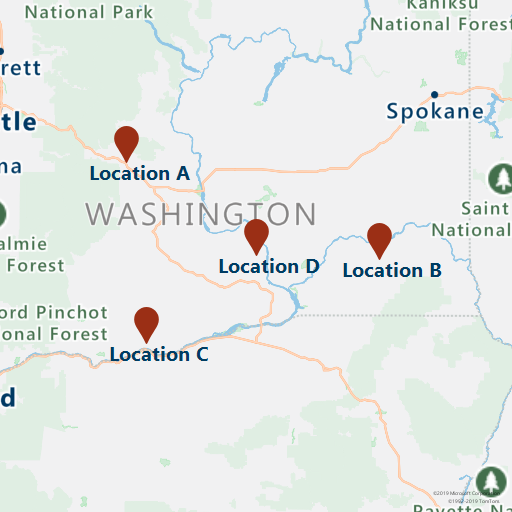

In [4]:
# Render the turbine locations on the map by calling the Azure Maps Get Map Image service
session = aiohttp.ClientSession()

pins="default|la-25+60|ls12|lc003C62|co9B2F15||'Location A'{} {}|'Location B'{} {}|'Location C'{} {}|'Location D'{} {}".format(coords[1],coords[0],coords[3],coords[2],coords[5],coords[4], coords[7],coords[6])

image_response = "https://atlas.microsoft.com/map/static?subscription-key={}&api-version=2024-04-01&layer=basic&style=main&zoom=6&center={},{}&pins={}".format(subscription_key,coords[7],coords[6],pins)

static_map_response = await session.get(image_response)

poi_range_map = await static_map_response.content.read()

await session.close()

display(Image(poi_range_map))

In [5]:
# Group forecasted data for all locations
df = df.reset_index(drop=True)
forecast_data = pd.DataFrame(columns=['StationID','latitude','longitude','Year','Month','Day','DryBulbCelsius','WetBulbFarenheit','WetBulbCelsius','DewPointFarenheit','DewPointCelsius','RelativeHumidity','WindSpeed','WindDirection'])

for i in range(len(station_ids)):
    loc_forecast = pd.DataFrame({'StationID':station_ids[i], 'latitude':coords[0], 'longitude':coords[1], 'Year':years, 'Month':months, 'Day':days, 'WindSpeed':wind_speeds[i], 'WindDirection':wind_direction[i]})
    forecast_data = pd.concat([forecast_data,loc_forecast], axis=0, sort=False)
    
combined_weather_data = pd.concat([df,forecast_data])
grouped_weather_data = combined_weather_data.groupby(['StationID'])

In [6]:
# Display data for first location
grouped_weather_data.get_group(station_ids[0]).reset_index()

,index,StationID,latitude,longitude,Year,Month,Day,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection
0,0,10397,47.149757,-120.805769,2019,11,9,14,56,13.2,55,13,93,6.0,230.0
1,1,10397,47.149757,-120.805769,2019,11,10,12.2,47,8.4,40,4.4,59,7.0,320.0
2,2,10397,47.149757,-120.805769,2019,11,11,10.6,40,4.5,25,-3.9,36,8.0,340.0
3,3,10397,47.149757,-120.805769,2019,11,12,8.3,46,7.5,44,6.7,89,15.0,80.0
4,4,10397,47.149757,-120.805769,2019,11,13,4.4,39,3.9,38,3.3,93,8.0,50.0
5,5,10397,47.149757,-120.805769,2019,11,14,10,44,6.4,36,2.2,59,5.0,330.0
6,6,10397,47.149757,-120.805769,2019,11,15,12.8,48,8.9,41,5,59,5.0,170.0
7,7,10397,47.149757,-120.805769,2019,11,16,16.7,55,12.7,49,9.4,63,6.0,180.0
8,8,10397,47.149757,-120.805769,2019,11,17,17.8,58,14.3,53,11.7,68,8.0,170.0
9,9,10397,47.149757,-120.805769,2019,11,18,18.9,62,16.5,59,15,78,6.0,180.0


In [7]:
# Plot wind speed
curr_date = datetime.datetime.now().date()
windsPlot_df = pd.DataFrame({ 'Location A': wind_speeds[0], 'Location B': wind_speeds[1], 'Location C': wind_speeds[2], 'Location D': wind_speeds[3]}, index=pd.date_range(curr_date,periods=15))
windsPlot = windsPlot_df.plot.line()
windsPlot.set_xlabel("Date")
windsPlot.set_ylabel("Wind speed")

Text(0, 0.5, 'Wind speed')

Text(0, 0.5, 'Wind direction')

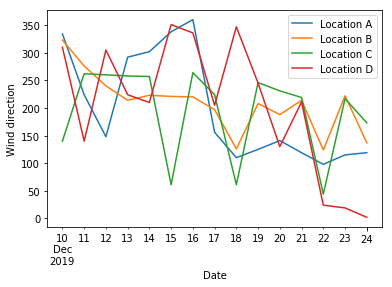

In [8]:
#Plot wind direction 
windsPlot_df = pd.DataFrame({ 'Location A': wind_direction[0], 'Location B': wind_direction[1], 'Location C': wind_direction[2], 'Location D': wind_direction[3]}, index=pd.date_range(curr_date,periods=15))
windsPlot = windsPlot_df.plot.line()
windsPlot.set_xlabel("Date")
windsPlot.set_ylabel("Wind direction")